# Ds Practical 3
Aim : Feature Scaling and Dummification.\
1.Apply feature-scaling techniques like standardization and normalization to
numerical features.\
2.Perform feature dummification to convert categorical variables into numerical
representations.

### Handling Numerical Data

Rescaling feature

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv("data_date.csv")   # replace with your file name

print("Original Dataset:")
print(df.head())

# Create scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scale numeric columns
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nScaled Dataset:")
print(df_scaled.head())


Original Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

Scaled Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good   0.013514
1  2022-07-21    Algeria                        Moderate   0.066528
2  2022-07-21    Andorra                        Moderate   0.056133
3  2022-07-21     Angola  Unhealthy for Sensitive Groups   0.116424
4  2022-07-21  Argentina                        Moderate   0.064449


Standardizing a feature

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your CSV file
df = pd.read_csv("data_date.csv")

print("Original Dataset:")
print(df.head())

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create scaler
scaler = StandardScaler()

# Apply scaling only on numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nStandardized Dataset:")
print(df.head())

# Optional: check mean & std
print("\nMean of numeric columns:")
print(df[numeric_cols].mean())

print("\nStd Dev of numeric columns:")
print(df[numeric_cols].std())


Original Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

Standardized Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good  -0.968853
1  2022-07-21    Algeria                        Moderate   0.051682
2  2022-07-21    Andorra                        Moderate  -0.148423
3  2022-07-21     Angola  Unhealthy for Sensitive Groups   1.012186
4  2022-07-21  Argentina                        Moderate   0.011661

Mean of numeric columns:
AQI Value   -3.843368e-18
dtype: float64

Std Dev of numeric columns:
AQI Value    1.000023
dtype: float64


Using Robust Method

In [5]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Load your CSV file
df = pd.read_csv("data_date.csv")   #
print("Original Dataset:")
print(df.head())
# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Create the RobustScaler
scaler = RobustScaler()
# Apply the scaler only to numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nRobust Scaled Dataset:")
print(df.head())
# Optional: Show medians and IQR-based scaling effect
print("\nMedian of numeric columns after scaling:")
print(df[numeric_cols].median())
print("\nIQR (approx) after scaling:")
print(df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25))


Original Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

Robust Scaled Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good  -0.716981
1  2022-07-21    Algeria                        Moderate   0.245283
2  2022-07-21    Andorra                        Moderate   0.056604
3  2022-07-21     Angola  Unhealthy for Sensitive Groups   1.150943
4  2022-07-21  Argentina                        Moderate   0.207547

Median of numeric columns after scaling:
AQI Value    0.0
dtype: float64

IQR (approx) after scaling:
AQI Value    1.0
dtype: float64


Normalizing Observation

In [6]:
import pandas as pd
from sklearn.preprocessing import Normalizer

# Load your CSV file
df = pd.read_csv("data_date.csv")
print("Original Dataset:")
print(df.head())
# Select only numeric columns (Normalizer works only with numeric data)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Extract numeric data
numeric_data = df[numeric_cols]
# Create L2 normalizer
normalizer = Normalizer(norm='l2')
# Apply L2 normalization row-wise
df_l2 = df.copy()
df_l2[numeric_cols] = normalizer.transform(numeric_data)
print("\nL2 Normalized Dataset:")
print(df_l2.head())


Original Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

L2 Normalized Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good        1.0
1  2022-07-21    Algeria                        Moderate        1.0
2  2022-07-21    Andorra                        Moderate        1.0
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        1.0
4  2022-07-21  Argentina                        Moderate        1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [8]:
from sklearn.preprocessing import Normalizer
# Create L1 normalizer
normalizer_l1 = Normalizer(norm='l1')
df_l1 = df.copy()
df_l1[numeric_cols] = normalizer_l1.transform(numeric_data)
print("\nL1 Normalized Dataset:")
print(df_l1.head())


L1 Normalized Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good        1.0
1  2022-07-21    Algeria                        Moderate        1.0
2  2022-07-21    Andorra                        Moderate        1.0
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        1.0
4  2022-07-21  Argentina                        Moderate        1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


Grouping Observation Using Clustring

In [9]:
import pandas as pd
from sklearn.cluster import KMeans

# Load your CSV file
df = pd.read_csv("data_date.csv")   # <-- your CSV file

print("Original Data:")
print(df.head())

# Select only numeric columns for clustering
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Extract numeric features
features = df[numeric_cols]

# Create K-Means model (choose number of clusters)
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
kmeans.fit(features)

# Predict cluster labels
df["cluster"] = kmeans.predict(features)
print("\nData with Cluster Labels:")
print(df.head())


Original Data:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

Data with Cluster Labels:
         Date    Country                          Status  AQI Value  cluster
0  2022-07-21    Albania                            Good         14        2
1  2022-07-21    Algeria                        Moderate         65        0
2  2022-07-21    Andorra                        Moderate         55        0
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113        0
4  2022-07-21  Argentina                        Moderate         63        0


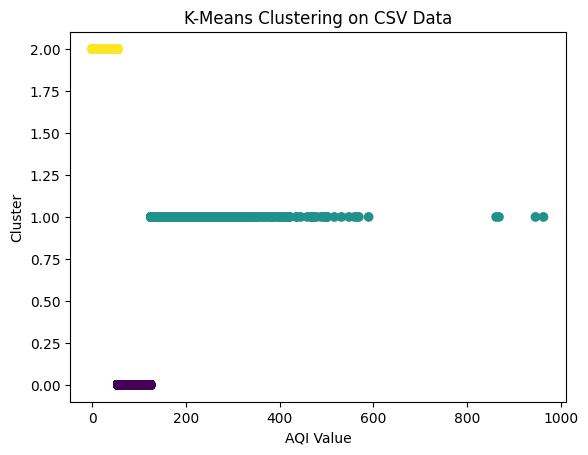

In [11]:
import matplotlib.pyplot as plt

# Plot the single numeric column against the cluster labels
plt.scatter(df[numeric_cols[0]], df["cluster"], c=df["cluster"])
plt.xlabel(numeric_cols[0])
plt.ylabel("Cluster") # Changed label to reflect clustering
plt.title("K-Means Clustering on CSV Data")
plt.show()


Deleting Observation With Missing Values

In [15]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("data_date.csv")   # your CSV file

print("Original Data:")
print(df.head())
print(df.shape)
# Delete rows that contain ANY missing value
df_clean = df.dropna()

print("\nDataset After Removing Missing Values:")
print(df_clean.head())
print(df_clean.shape)


Original Data:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63
(22185, 4)

Dataset After Removing Missing Values:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63
(22185, 4)


Imputing Missing Values

In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your CSV file
df = pd.read_csv("data_date.csv")

print("Original Dataset:")
print(df.head())

# Select numeric columns only (imputation works on numeric data)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create mean imputer
imputer = SimpleImputer(strategy="mean")

# Apply imputer on numeric columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

print("\nDataset After Mean Imputation:")
print(df.head())


Original Dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

Dataset After Mean Imputation:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good       14.0
1  2022-07-21    Algeria                        Moderate       65.0
2  2022-07-21    Andorra                        Moderate       55.0
3  2022-07-21     Angola  Unhealthy for Sensitive Groups      113.0
4  2022-07-21  Argentina                        Moderate       63.0


### Handling Categorical Data
        

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your CSV
df = pd.read_csv("StudentsPerformance.csv")

print("Original Dataset:")
print(df.head())

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convert back to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded columns with original numeric columns
final_df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print("\nOne-Hot Encoded Dataset:")
print(final_df.head())


Original Dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

One-Hot Encoded Dataset:
   math score  reading score  writing score  gender_female  gender_male  \
0          72             72            

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your CSV
df = pd.read_csv("StudentsPerformance.csv")

# Select categorical columns (object type)
categorical_cols = df.select_dtypes(include=["object"]).columns

# Create encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit + Transform
encoded = encoder.fit_transform(df[categorical_cols])

# Inverse Transform (convert back to original values)
decoded = encoder.inverse_transform(encoded)

# Convert back to DataFrame
decoded_df = pd.DataFrame(decoded, columns=categorical_cols)

print("Decoded (Original) Categorical Values:")
print(decoded_df.head())


Decoded (Original) Categorical Values:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  
0                    none  
1               completed  
2                    none  
3                    none  
4                    none  


In [22]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("StudentsPerformance.csv")
#print("Original Data:")
#print(df.head())
# Apply get_dummies to ALL categorical columns
df_encoded = pd.get_dummies(df)
print("\nOne-Hot Encoded Dataset (using get_dummies):")
print(df_encoded.head())



One-Hot Encoded Dataset (using get_dummies):
   math score  reading score  writing score  gender_female  gender_male  \
0          72             72             74           True        False   
1          69             90             88           True        False   
2          90             95             93           True        False   
3          47             57             44          False         True   
4          76             78             75          False         True   

   race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                   False                    True                   False   
1                   False                   False                    True   
2                   False                    True                   False   
3                    True                   False                   False   
4                   False                   False                    True   

   race/ethnicity_group D  race/ethnicit

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

df = pd.read_csv("/content/StudentsPerformance.csv")

lb = LabelBinarizer()
group_encoded = lb.fit_transform(df["race/ethnicity"])

df_encoded = pd.DataFrame(group_encoded, columns=lb.classes_)

final_df = pd.concat([df, df_encoded], axis=1)

print(final_df)


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72        

Encoding ordinal categorical features

In [27]:
df=pd.read_csv("/content/StudentsPerformance.csv")
# Define a scale_mapper that correctly maps the actual educational levels to numerical values
scale_mapper = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}

df["parental level of education"] = df["parental level of education"].replace(scale_mapper)
print(df["parental level of education"])

0      4
1      2
2      5
3      3
4      2
      ..
995    5
996    1
997    1
998    2
999    2
Name: parental level of education, Length: 1000, dtype: int64


/tmp/ipython-input-920343870.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["parental level of education"] = df["parental level of education"].replace(scale_mapper)


Encoding Dictionaries of features

In [31]:
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

# Load the CSV
df = pd.read_csv("/content/StudentsPerformance.csv")

# Convert DataFrame → list of dictionaries (each row)
data_dict = df.to_dict(orient="records")

# Create DictVectorizer
dv = DictVectorizer(sparse=False)

# Fit + Transform
features = dv.fit_transform(data_dict)

print("Feature matrix shape:", features.shape)
print(features)

Feature matrix shape: (1000, 20)
[[ 1.  0.  0. ...  0.  1. 74.]
 [ 1.  0.  0. ...  1.  0. 88.]
 [ 1.  0.  0. ...  0.  1. 93.]
 ...
 [ 1.  0.  1. ...  1.  0. 65.]
 [ 1.  0.  0. ...  1.  0. 77.]
 [ 1.  0.  1. ...  0.  1. 86.]]


In [33]:
dv.get_feature_names_out()

array(['gender=female', 'gender=male', 'lunch=free/reduced',
       'lunch=standard', 'math score',
       "parental level of education=associate's degree",
       "parental level of education=bachelor's degree",
       'parental level of education=high school',
       "parental level of education=master's degree",
       'parental level of education=some college',
       'parental level of education=some high school',
       'race/ethnicity=group A', 'race/ethnicity=group B',
       'race/ethnicity=group C', 'race/ethnicity=group D',
       'race/ethnicity=group E', 'reading score',
       'test preparation course=completed',
       'test preparation course=none', 'writing score'], dtype=object)

###Handling Imbalanced Classes

In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your CSV
df = pd.read_csv("StudentsPerformance.csv")  # change CSV name if needed
# SELECT TARGET COLUMN-
target_column = "gender"
# Convert target into binary: class0 vs class1
# Example: predict if gender == "female"
binary_target = np.where(df[target_column] == df[target_column].unique()[0], 0, 1)
# Prepare feature matrix (all columns except target)
X = df.drop(columns=[target_column])
# Convert categorical to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
# Target
y = binary_target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
weights = {0: 0.9, 1: 0.1}
# Build Random Forest Classifier with weights
clf = RandomForestClassifier(
    class_weight=weights,
    random_state=0
)
# Train the model
clf.fit(X_train, y_train)
# Check accuracy
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))


Training Accuracy: 1.0
Testing Accuracy: 0.875


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

CSV_PATH = "StudentsPerformance.csv"  # <-- change
target_column = "race/ethnicity"      # <-- corrected from "group"

df = pd.read_csv(CSV_PATH)

# prepare X (features) and y (target)
X = df.drop(columns=[target_column])
X = pd.get_dummies(X, drop_first=True)   # convert categoricals
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

clf = RandomForestClassifier(class_weight='balanced', random_state=0, n_estimators=100)
clf.fit(X_train, y_train)

print("Train score:", clf.score(X_train, y_train))
print("Test score :", clf.score(X_test, y_test))


Train score: 1.0
Test score : 0.27
